In [402]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

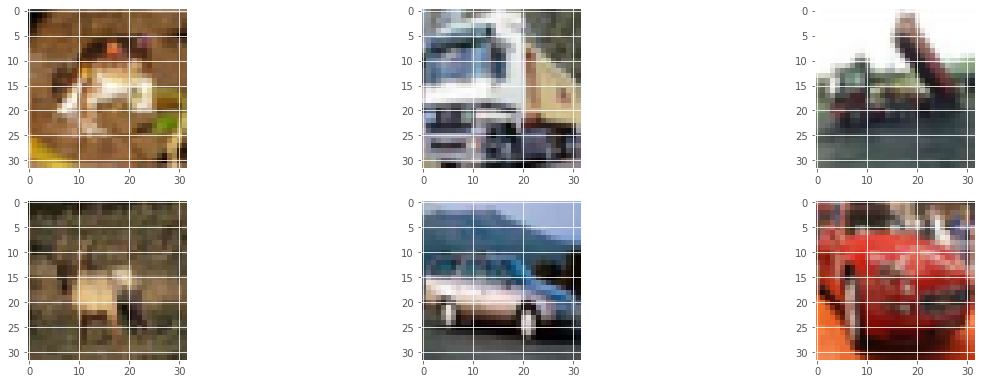

In [345]:
import matplotlib.pyplot as plt
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
plt.show()

In [347]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [348]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [349]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [350]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [352]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

In [353]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)             

In [354]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 220s 139ms/step - loss: 1.6851 - accuracy: 0.3913 - val_loss: 1.3611 - val_accuracy: 0.5140
Epoch 2/10
1563/1563 [==============================] - 201s 129ms/step - loss: 1.2996 - accuracy: 0.5314 - val_loss: 1.1771 - val_accuracy: 0.5851
Epoch 3/10
1563/1563 [==============================] - 186s 119ms/step - loss: 1.1338 - accuracy: 0.5955 - val_loss: 1.0679 - val_accuracy: 0.6215
Epoch 4/10
1563/1563 [==============================] - 202s 129ms/step - loss: 1.0155 - accuracy: 0.6375 - val_loss: 1.0145 - val_accuracy: 0.6396
Epoch 5/10
1563/1563 [==============================] - 195s 125ms/step - loss: 0.9237 - accuracy: 0.6720 - val_loss: 0.9855 - val_accuracy: 0.6508
Epoch 6/10
1563/1563 [==============================] - 205s 131ms/step - loss: 0.8453 - accuracy: 0.6993 - val_loss: 0.9590 - val_accuracy: 0.6605
Epoch 7/10
1563/1563 [==============================] - 191s 122ms/step - loss: 0.7707 - accuracy: 0.7255 - val_

In [357]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 7s 22ms/step - loss: 0.9263 - accuracy: 0.6860
68.59999895095825


In [365]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.77      0.73      1000
           1       0.81      0.79      0.80      1000
           2       0.65      0.46      0.54      1000
           3       0.47      0.54      0.50      1000
           4       0.59      0.67      0.63      1000
           5       0.60      0.56      0.58      1000
           6       0.77      0.73      0.75      1000
           7       0.73      0.77      0.75      1000
           8       0.80      0.81      0.80      1000
           9       0.77      0.76      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000



In [366]:
model.save('d.h5')

In [408]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
from keras.models import load_model
model = load_model('C:/Users/elif/Desktop/dataSound/data/data/eygidi.h5')
classes = { 
    0:'uçak',
    1:'araba',
    2:'kuş',
    3:'kedi',
    4:'geyik',
    5:'köpek',
    6:'kurbağa',
    7:'at',
    8:'koyun',
    9:'kamyon',
}
top=tk.Tk()
top.geometry('800x600')
top.title('Deep Learning')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((32,32))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred=np.argmax(model.predict([image])[0],axis=-1)
    sign = classes[pred]
    print(pred)
    label.configure(foreground='#011638', text=sign)     
def show_classify_button(file_path):
    classify_b=Button(top,text="Sınıflandır",
    command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Yükle",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Deep Learning Projesi",pady=20, font=('arial',20,'bold'))

heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

5
1
7
